# Node Counts

In [5]:
import xml.etree.ElementTree as ET


def count_unique_node_ids(file_name):
    # Parse the XML file
    try:
        tree = ET.parse(file_name)
    except Exception as e:
        print(f"Error while parsing the file: {e}")
        return

    # Get the root of the XML document
    root = tree.getroot()

    # Use a set to store unique node ids
    unique_ids = set()

    # Try to find all 'node' tags in the XML and add their ids to the set
    try:
        for node in root.findall('.//{http://graphml.graphdrawing.org/xmlns}node'):
            # Get the id attribute of the 'node' tag
            node_id = node.get('id')

            # Add the id to the set of unique ids
            unique_ids.add(node_id)
    except Exception as e:
        print(f"Error while processing nodes: {e}")
        return

    # The number of unique node ids is the size of the set
    return len(unique_ids)


# Replace 'filename.graphml' with the actual name of your file
file_name = 'map.graphml'
print("Number of unique node ids in the file: ", count_unique_node_ids(file_name))


Number of unique node ids in the file:  67


# Visualisation

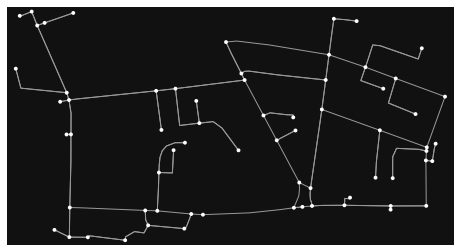

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [6]:
import osmnx as ox


# Replace 'path/to/your/osm_file.osm' with the path to your OSM file
osm_file = '/Users/dingyue/PycharmProjects/pythonProject/osm/map.graphml'

# Load the OSM file as a networkx graph
G = ox.io.load_graphml(osm_file)

# Plot the street network
ox.plot_graph(G)


In [31]:
import networkx as nx
import osmnx as ox
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

def plot_network_with_path(G, shortest_path, figsize=(12, 12)):
    # Create edge list for shortest path
    shortest_path_edges = list(zip(shortest_path[:-1], shortest_path[1:]))

    # Define colors for different road types
    edge_colors = {
        'motorway': 'blue',
        'primary': 'green',
        'secondary': 'yellow',
        'tertiary': 'orange',
        'residential': 'gray',
        'footway': 'pink',
        'cycleway': 'cyan',
        'tunnel': 'darkgray',
        'unclassified': 'white',
        'service': 'purple'
    }

    nc = ['red' if node in shortest_path else 'lightblue' for node in G.nodes()]
    ec_list = []

    for u, v, data in G.edges(data=True):
        if (u, v) in shortest_path_edges or (v, u) in shortest_path_edges:  # For the shortest path
            ec_list.append('red')
        else:
            road_type = data.get('highway', None)
            if isinstance(road_type, list):  # Sometimes, a road can have multiple types
                road_type = road_type[0]
            ec_list.append(edge_colors.get(road_type, 'white'))  # Default to white if type not in our dictionary

    # Plot the street network with the specified figure size
    fig, ax = ox.plot_graph(G, node_color=nc, edge_color=ec_list, node_size=10, bgcolor='black', figsize=(20,20), show=False)

    # Add node IDs as annotations
    for node, data in G.nodes(data=True):
        ax.annotate(str(node), (data['x'], data['y']), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='white')

    # Create legend handles
    legend_handles = []
    for road_type, color in edge_colors.items():
        legend_handles.append(mlines.Line2D([0], [0], color=color, label=road_type))
    legend_handles.append(mlines.Line2D([0], [0], color='red', label='Shortest Path'))

    # Display the legend
    ax.legend(handles=legend_handles, loc='upper left', fontsize='small')
    plt.show()


# Shortest Path

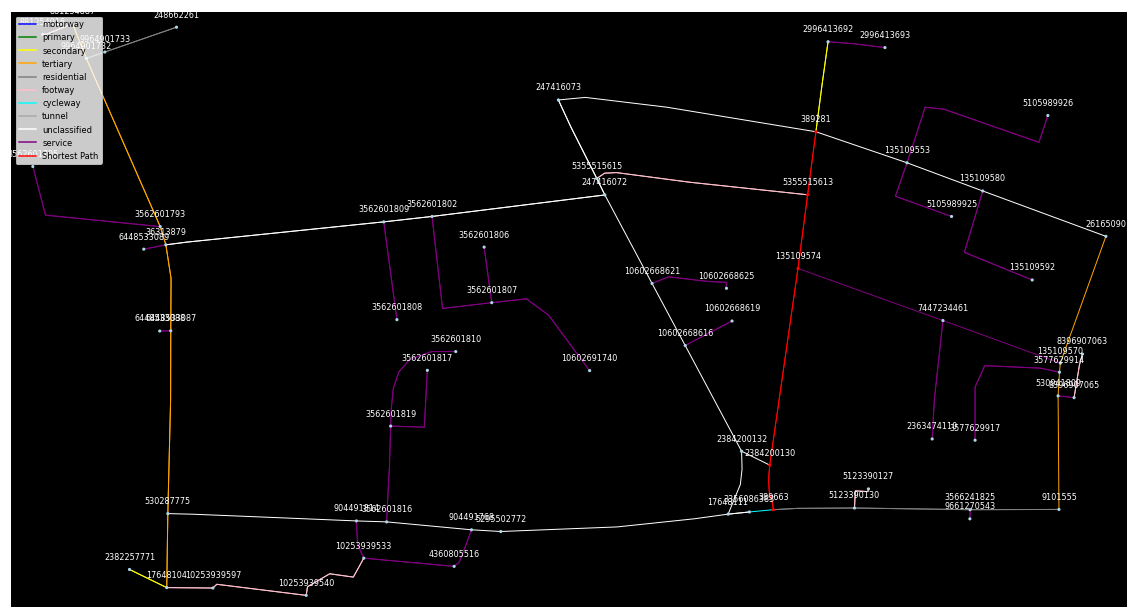

the time of dijkstra is: 0.00036978721618652344


In [38]:
import osmnx as ox
import time
import networkx as nx
import matplotlib.pyplot as plt

# Load the GraphML file
osm_file = '/Users/dingyue/PycharmProjects/pythonProject/osm/map.graphml'
G = ox.io.load_graphml(osm_file)

start_time_dj = time.time()
# Find the shortest path
shortest_path = nx.dijkstra_pa`th(G, 389281, 389663)
end_time_dj = time.time()

plot_network_with_path(G, shortest_path)
print("the time of dijkstra is:", end_time_dj - start_time_dj)

In [11]:
print(389281 in G.nodes)
print(389663 in G.nodes)


True
True


{'osmid': 532427444, 'lanes': '3', 'ref': 'R114', 'name': 'Aungier Street', 'highway': 'secondary', 'maxspeed': '30', 'oneway': False, 'reversed': True, 'length': 22.329}
{'osmid': 14039949, 'oneway': True, 'name': 'York Street', 'highway': 'unclassified', 'maxspeed': '30', 'reversed': False, 'length': 33.799, 'geometry': <LINESTRING (-6.266 53.34, -6.266 53.34, -6.265 53.339)>}
{'osmid': 532427444, 'lanes': '3', 'ref': 'R114', 'name': 'Aungier Street', 'highway': 'secondary', 'maxspeed': '30', 'oneway': False, 'reversed': False, 'length': 31.899, 'geometry': <LINESTRING (-6.266 53.34, -6.266 53.34, -6.266 53.34)>}
{'osmid': 3791744, 'lanes': '3', 'ref': 'R114', 'name': 'Aungier Street', 'highway': 'secondary', 'maxspeed': '30', 'oneway': False, 'reversed': False, 'length': 15.889999999999999, 'geometry': <LINESTRING (-6.266 53.338, -6.266 53.338, -6.266 53.338, -6.266 53.338, -6....>}
{'osmid': 14039867, 'lanes': '2', 'name': 'Digges Street Upper', 'highway': 'residential', 'maxspeed'

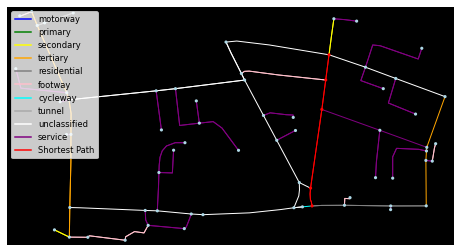

In [34]:
import matplotlib.lines as mlines
import osmnx as ox

# ... (The rest of your code for loading the graph and finding the shortest path) ...

# Define colors for different road types
edge_colors = {
    'motorway': 'blue',
    'primary': 'green',
    'secondary': 'yellow',
    'tertiary': 'orange',
    'residential': 'gray',
    'footway': 'pink',
    'cycleway': 'cyan',
    'tunnel': 'darkgray',
    'unclassified': 'white',
    'service': 'purple'
}

nc = ['red' if node in shortest_path else 'lightblue' for node in G.nodes()]
ec_list = []

for u, v, data in G.edges(data=True):
    print(data)
    if (u, v) in shortest_path_edges or (v, u) in shortest_path_edges:  # For the shortest path
        ec_list.append('red')
    else:
        road_type = data.get('highway', None)
        if isinstance(road_type, list):  # Sometimes, a road can have multiple types
            road_type = road_type[0]
        ec_list.append(edge_colors.get(road_type, 'back'))  # Default to white if type not in our dictionary

# Plot the street network
fig, ax = ox.plot_graph(G, node_color=nc, edge_color=ec_list, node_size=10, bgcolor='black', show=False)

# Create legend handles
legend_handles = []
for road_type, color in edge_colors.items():
    legend_handles.append(mlines.Line2D([0], [0], color=color, label=road_type))
legend_handles.append(mlines.Line2D([0], [0], color='red', label='Shortest Path'))

# Display the legend
ax.legend(handles=legend_handles, loc='upper left', fontsize='small')
plt.show()


# RL

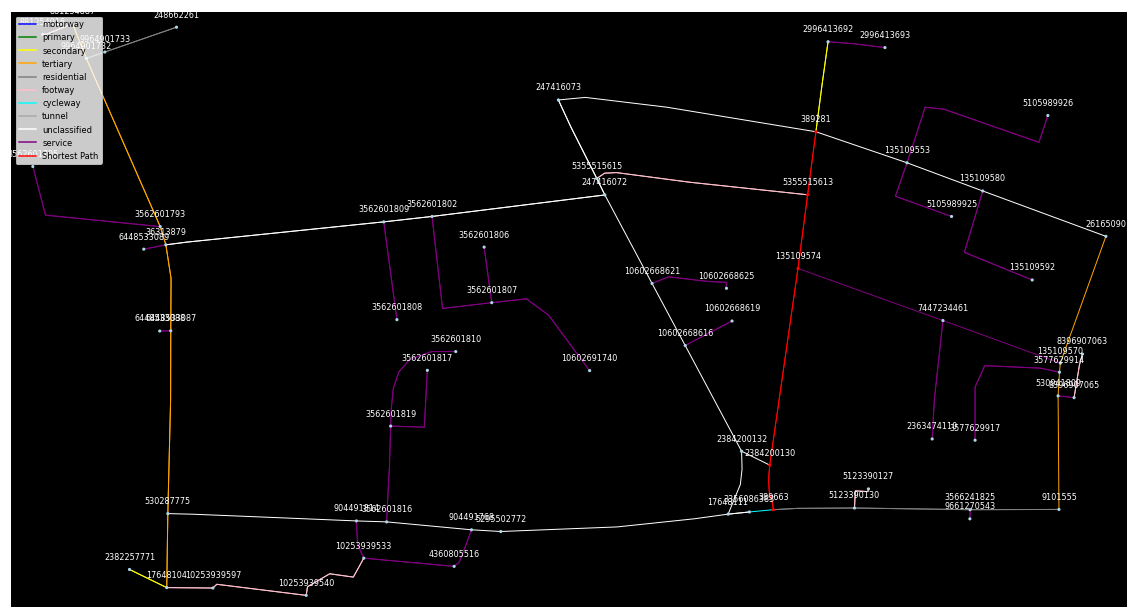

In [35]:
import networkx as nx
import random

# Parameters
ALPHA = 0.1  # learning rate
GAMMA = 0.9  # discount factor
EPSILON = 0.3  # for ε-greedy exploration

# Q-value initialization
Q = {}
for node in G.nodes:
    for neighbor in G.neighbors(node):
        Q[(node, neighbor)] = 0

# Q-learning algorithm
def q_learning(start, end, episodes=1000):
    for episode in range(episodes):
        current = start
        while current != end:
            # Choose an action: ε-greedy strategy
            if random.uniform(0, 1) < EPSILON:
                action = random.choice(list(G.neighbors(current)))
            else:
                action = max(G.neighbors(current), key=lambda x: Q[(current, x)])
            
            # Get the reward
            reward = 100 if action == end else -1

            # Update the Q-value
            old_value = Q[(current, action)]
            next_max = max(Q[(action, n)] for n in G.neighbors(action))
            Q[(current, action)] = (1 - ALPHA) * old_value + ALPHA * (reward + GAMMA * next_max)
            
            current = action

    # Return the optimal path
    path = [start]
    while path[-1] != end:
        next_step = max(G.neighbors(path[-1]), key=lambda x: Q[(path[-1], x)])
        path.append(next_step)
    return path

# Test
start_node = 389281
end_node = 389663
shortest_path = q_learning(start_node, end_node)
plot_network_with_path(G, shortest_path)


In [ ]:
import networkx as nx
import random

# Parameters
ALPHA = 0.1  # learning rate
GAMMA = 0.9  # discount factor
EPSILON = 0.3  # for ε-greedy exploration

# Q-value initialization
Q = {}
for node in G.nodes:
    for neighbor in G.neighbors(node):
        Q[(node, neighbor)] = 0

# Q-learning algorithm
def q_learning(start, end, episodes=1000):
    for episode in range(episodes):
        current = start
        while current != end:
            # Choose an action: ε-greedy strategy
            if random.uniform(0, 1) < EPSILON:
                action = random.choice(list(G.neighbors(current)))
            else:
                action = max(G.neighbors(current), key=lambda x: Q[(current, x)])
            
            # Get the reward
            reward = 100 if action == end else -1

            # Update the Q-value
            old_value = Q[(current, action)]
            next_max = max(Q[(action, n)] for n in G.neighbors(action))
            Q[(current, action)] = (1 - ALPHA) * old_value + ALPHA * (reward + GAMMA * next_max)
            
            current = action

    # Return the optimal path
    path = [start]
    while path[-1] != end:
        next_step = max(G.neighbors(path[-1]), key=lambda x: Q[(path[-1], x)])
        path.append(next_step)
    return path

# Test
start_node = 389281
end_node = 389663
shortest_path = q_learning(start_node, end_node)
plot_network_with_path(G, shortest_path)


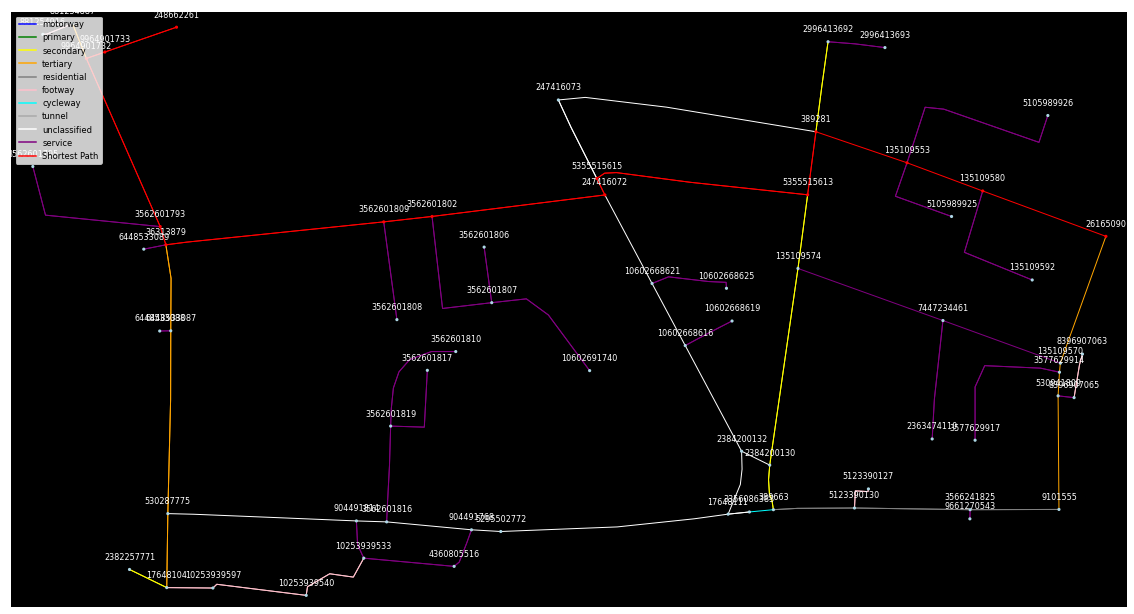

the time of RL is: 0.06470584869384766


In [37]:
import networkx as nx
import random
import time

# Parameters
ALPHA = 0.1  # learning rate
GAMMA = 0.9  # discount factor
EPSILON = 0.3  # for ε-greedy exploration

# Q-value initialization
Q = {}
for node in G.nodes:
    for neighbor in G.neighbors(node):
        Q[(node, neighbor)] = 0

# Q-learning algorithm
def q_learning(start, end, episodes=1000):
    for episode in range(episodes):
        current = start
        while current != end:
            # Choose an action: ε-greedy strategy
            if random.uniform(0, 1) < EPSILON:
                action = random.choice(list(G.neighbors(current)))
            else:
                action = max(G.neighbors(current), key=lambda x: Q[(current, x)])
            
            # Get the reward
            reward = 100 if action == end else -1

            # Update the Q-value
            old_value = Q[(current, action)]
            next_max = max(Q[(action, n)] for n in G.neighbors(action))
            Q[(current, action)] = (1 - ALPHA) * old_value + ALPHA * (reward + GAMMA * next_max)
            
            current = action

    # Return the optimal path
    path = [start]
    while path[-1] != end:
        next_step = max(G.neighbors(path[-1]), key=lambda x: Q[(path[-1], x)])
        path.append(next_step)
    return path

# Test
start_node = 248662261
end_node = 26165090
start_time_RL = time.time()
shortest_path = q_learning(start_node, end_node)
end_time_RL = time.time()
plot_network_with_path(G, shortest_path)
print("the time of RL is:", end_time_RL - start_time_RL)


In [45]:
import numpy as np
import random
import osmnx as ox
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

def visualize_optimal_path(G, start, end):
    # Reinforcement Learning Parameters
    alpha = 0.5  # Learning rate
    gamma = 0.9  # Discount factor
    epsilon = 1.0  # Exploration rate
    epsilon_decay = 0.995  # Decay rate for epsilon
    episodes = 5000  # Number of episodes to train for
    
    # Initialize Q-table with zeros
    nodes = list(G.nodes())
    Q = {node: {neighbor: {'distance': 0} for neighbor in G[node]} for node in nodes}

    # Q-learning algorithm
    for episode in range(episodes):
        state = start
        done = False

        while not done:
            if random.uniform(0, 1) < epsilon:
                action = random.choice(list(Q[state].keys()))
            else:
                action = max(Q[state], key=lambda x: sum(Q[state][x].values()))

            # Transition
            reward = -float(G[state][action]['d17'])

            done = action == end

            old_q_value = Q[state][action]['distance']  # Retrieve old Q-value from Q-table
            next_max = max([Q[action][a]['distance'] for a in Q[action]]) if not done else 0
            new_q_value = (1 - alpha) * old_q_value + alpha * (reward + gamma * next_max)
            Q[state][action]['distance'] = new_q_value

            state = action

        if epsilon > 0.01:
            epsilon *= epsilon_decay

    # Extract path from Q-table
    path = [start]
    while start != end:
        action = max(Q[start], key=lambda x: Q[start][x]['distance'])
        path.append(action)
        start = action

    shortest_path_edges = list(zip(path[:-1], path[1:]))

    # Visualization Code
    edge_colors = {
        'motorway': 'blue',
        'primary': 'green',
        'secondary': 'yellow',
        'tertiary': 'orange',
        'residential': 'gray',
        'footway': 'pink',
        'cycleway': 'cyan',
        'tunnel': 'darkgray',
        'unclassified': 'white',
        'service': 'purple'
    }

    nc = ['red' if node in path else 'lightblue' for node in G.nodes()]
    ec_list = []

    for u, v, data in G.edges(data=True):
        if (u, v) in shortest_path_edges or (v, u) in shortest_path_edges:
            ec_list.append('red')
        else:
            road_type = data.get('d13', None)  # Updated to fetch 'd13' as the highway type
            if isinstance(road_type, list):
                road_type = road_type[0]
            ec_list.append(edge_colors.get(road_type, 'black'))

    fig, ax = ox.plot_graph(G, node_color=nc, edge_color=ec_list, node_size=10, node_zorder=3, 
                            edge_linewidth=0.5, node_label=True, figsize=(12,12), bgcolor='black', show=False)

    legend_handles = [mlines.Line2D([0], [0], color=color, label=road_type) for road_type, color in edge_colors.items()]
    legend_handles.append(mlines.Line2D([0], [0], color='red', label='Optimal Path'))

    ax.legend(handles=legend_handles, loc='upper left', fontsize='small')
    plt.show()
    
    return path


In [46]:
# Test
start_node = 248662261
end_node = 26165090
start_time_RL = time.time()
shortest_path = visualize_optimal_path(G, start_node, end_node)
end_time_RL = time.time()
print("the time of the constrainRL is:", end_time_RL - start_time_RL)


KeyError: 'd17'